Figure 4  

Correlation between flash detection accuracy and BIC scores (Bayesian Causal Inference Model Fitting)

In [2]:
# Imports
import os
import importlib
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('csv/all_participants.csv')
details_df = pd.read_csv('subject_details.csv')
details_df = details_df[['SID', 'Age', 'Onset', 'Duration']]
details_df = details_df.rename(columns={'SID': 'sid'})

bci_df = pd.read_csv('csv/modeling/outputs/bci_best_models.csv')
# only keep location=='raw'
bci_df = bci_df[bci_df['location']=='raw']
bci_df = bci_df.rename(columns={'subject_id': 'sid'})

final_df = details_df.merge(bci_df, on=['sid'], how='left')
final_df = final_df[final_df['group']=='Low Vision']

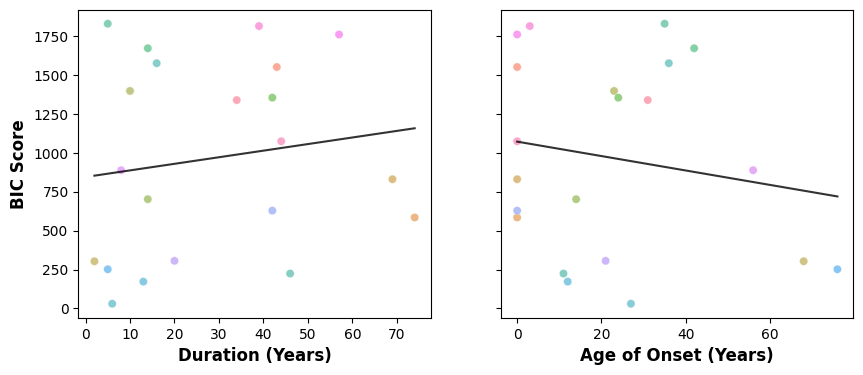

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True)

for i, x_val in enumerate(['Duration', 'Onset']):
    sns.scatterplot(
        data=final_df,
        x=x_val,
        y='bic',
        hue='sid',
        alpha=0.6,
        legend=False,
        ax=ax[i]
    )

    # Add regression lines
    sns.regplot(
        data=final_df,
        x=x_val,
        y='bic',
        scatter=False, 
        color='black', 
        ci=None,
        line_kws={'linewidth': 1.5, 'alpha': 0.8},
        ax=ax[i]
    )

fontsize=12
ax[0].set_ylabel('BIC Score', fontsize=fontsize, fontweight='bold')
ax[0].set_xlabel('Duration (Years)', fontsize=fontsize, fontweight='bold')
ax[1].set_xlabel('Age of Onset (Years)', fontsize=fontsize, fontweight='bold')

# plt.suptitle("Correlation between Disease Characteristics\nand BIC Scores (Model Performance)", fontsize=fontsize, fontweight='bold')
plt.show()


In [5]:
from scipy.stats import pearsonr

corr_results = []
for i, x_val in enumerate(['Duration', 'Onset']):

    valid = final_df.dropna(subset=['Duration', 'Onset'])
    if len(valid) > 1:
        r, p = pearsonr(valid[x_val], valid['bic'])
        corr_results.append({'metric': x_val, 'r': r, 'p': p, 'n': len(valid)})
    else:
        corr_results.append({'metric': x_val, 'r': None, 'p': None, 'n': len(valid)})

corr_df = pd.DataFrame(corr_results)
print(corr_df)

     metric         r         p   n
0  Duration  0.151555  0.511958  21
1     Onset -0.173184  0.452813  21
